In [1]:
from anomaly_detection import anomaly_detection_, plot_pca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
RSP1 = pd.read_csv('../../RSP数据块/Block 1.csv')
RSP1_AD = pd.read_csv('../../RSP_AD/Block 1 AD 0.003.csv')

In [15]:
df_test = pd.read_csv('C:/Users/86135/Desktop/大数据处理大作业/test.csv')
X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values

In [14]:
from sklearn.ensemble import RandomForestClassifier

X_rsp1 = RSP1.drop('label',axis=1).values
y_rsp1 = RSP1['label'].values

X_rsp1AD = RSP1_AD.drop('label',axis=1).values
y_rsp1AD = RSP1_AD['label'].values

In [ ]:
clf1 = RandomForestClassifier().fit(X_rsp1, y_rsp1)

In [19]:
clf2 = RandomForestClassifier().fit(X_rsp1AD, y_rsp1AD)

In [16]:
print('clf1 scores: ', clf1.score(X_test, y_test))

clf1 scores:  0.72472
clf2 scores:  0.7244227272727273


In [20]:
print('clf2 scores: ', clf2.score(X_test, y_test))

clf2 scores:  0.7243657575757576


In [17]:
clf1.score(X_rsp1, y_rsp1)

0.9999935064935065

## 测试异常值比例对acc的影响

In [26]:
# score_list = []
# for AD_rate in [0.001, 0.008, 0.01, 0.015]:
#     print('AD_rate: ', AD_rate)
#     block_AD, _ = anomaly_detection_(RSP1, Standard=False, outliers_fraction=AD_rate)# 不标准化
#     X_rsp1AD = block_AD.drop('label', axis=1).values
#     y_rsp1AD = block_AD['label'].values
#     clf = RandomForestClassifier().fit(X_rsp1AD, y_rsp1AD)
#     tmp_score = clf.score(X_test, y_test)
#     score_list.append(tmp_score)
#     print(AD_rate, ': ', tmp_score)

AD_rate:  0.001
0.001 :  0.7243678787878788
AD_rate:  0.008
0.008 :  0.7246048484848485
AD_rate:  0.01
0.01 :  0.7243872727272728
AD_rate:  0.015
0.015 :  0.7247075757575757


In [25]:
# score_list = []
# for AD_rate in [0.007, 0.02, 0.03, 0.04]:
#     print('AD_rate: ', AD_rate)
#     block_AD, _ = anomaly_detection_(RSP1, Standard=False, outliers_fraction=AD_rate)# 不标准化
#     X_rsp1AD = block_AD.drop('label', axis=1).values
#     y_rsp1AD = block_AD['label'].values
#     clf = RandomForestClassifier().fit(X_rsp1AD, y_rsp1AD)
#     tmp_score = clf.score(X_test, y_test)
#     score_list.append(tmp_score)
#     print(AD_rate, ': ', tmp_score)

AD_rate:  0.007
0.007 :  0.7247206060606061
AD_rate:  0.02
0.02 :  0.7240475757575757
AD_rate:  0.03
0.03 :  0.7238666666666667
AD_rate:  0.04
0.04 :  0.7236487878787878


In [27]:
# score_list = []
# for AD_rate in [0.1, 0.2]:
#     print('AD_rate: ', AD_rate)
#     block_AD, _ = anomaly_detection_(RSP1, Standard=False, outliers_fraction=AD_rate)# 不标准化
#     X_rsp1AD = block_AD.drop('label', axis=1).values
#     y_rsp1AD = block_AD['label'].values
#     clf = RandomForestClassifier().fit(X_rsp1AD, y_rsp1AD)
#     tmp_score = clf.score(X_test, y_test)
#     score_list.append(tmp_score)
#     print(AD_rate, ': ', tmp_score)

AD_rate:  0.1
0.1 :  0.7218778787878788
AD_rate:  0.2
0.2 :  0.7183990909090909


0.001 :  0.7243678787878788
0.007 :  0.7247206060606061
0.008 :  0.7246048484848485
0.010 :  0.7243872727272728
0.015 :  0.7247075757575757
0.020 :  0.7240475757575757
0.030 :  0.7238666666666667
0.040 :  0.7236487878787878
0.100 :  0.7218778787878788
0.200 :  0.7183990909090909

测试 rate 0.001到0.01

In [29]:
score_list = []
for AD_rate in np.linspace(0.001, 0.01, 10):
    print('AD_rate: ', AD_rate)
    block_AD, _ = anomaly_detection_(RSP1, Standard=False, outliers_fraction=AD_rate)# 不标准化
    X_rsp1AD = block_AD.drop('label', axis=1).values
    y_rsp1AD = block_AD['label'].values
    clf = RandomForestClassifier().fit(X_rsp1AD, y_rsp1AD)
    tmp_score = clf.score(X_test, y_test)
    score_list.append(tmp_score)
    print(AD_rate, ': ', tmp_score)

AD_rate:  0.001
0.001 :  0.7241639393939394
AD_rate:  0.002
0.002 :  0.72421
AD_rate:  0.003
0.003 :  0.7243427272727273
AD_rate:  0.004
0.004 :  0.7244839393939394
AD_rate:  0.005
0.005 :  0.7245409090909091
AD_rate:  0.006
0.006 :  0.7249633333333333
AD_rate:  0.007
0.007 :  0.724509393939394
AD_rate:  0.008
0.008 :  0.7246042424242424
AD_rate:  0.009000000000000001
0.009000000000000001 :  0.7244836363636363
AD_rate:  0.01
0.01 :  0.7245118181818182


发现0.004到0.006表现不错

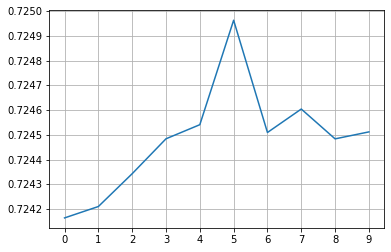

In [33]:
plt.plot(range(len(score_list)), score_list)
_ = plt.xticks(range(len(score_list)))
plt.grid()

In [35]:
score_list = []
for AD_rate in np.linspace(0.004, 0.006, 10):
    print('AD_rate: ', AD_rate)
    block_AD, _ = anomaly_detection_(RSP1, Standard=False, outliers_fraction=AD_rate)# 不标准化
    X_rsp1AD = block_AD.drop('label', axis=1).values
    y_rsp1AD = block_AD['label'].values
    clf = RandomForestClassifier().fit(X_rsp1AD, y_rsp1AD)
    tmp_score = clf.score(X_test, y_test)
    score_list.append(tmp_score)
    print(AD_rate, ': ', tmp_score)

AD_rate:  0.004
0.004 :  0.7245369696969697
AD_rate:  0.004222222222222223
0.004222222222222223 :  0.724729696969697
AD_rate:  0.0044444444444444444
0.0044444444444444444 :  0.7243636363636363
AD_rate:  0.004666666666666667
0.004666666666666667 :  0.7243845454545454
AD_rate:  0.004888888888888889
0.004888888888888889 :  0.7246087878787879
AD_rate:  0.005111111111111111
0.005111111111111111 :  0.724469090909091
AD_rate:  0.005333333333333334
0.005333333333333334 :  0.7243890909090909
AD_rate:  0.005555555555555556
0.005555555555555556 :  0.7245227272727273
AD_rate:  0.0057777777777777775
0.0057777777777777775 :  0.7246533333333334
AD_rate:  0.006
0.006 :  0.7243633333333334


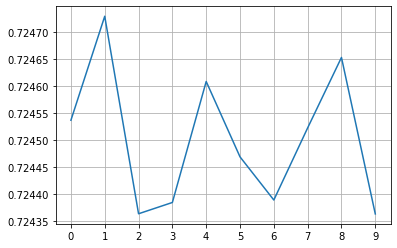

In [36]:
plt.plot(range(len(score_list)), score_list)
_ = plt.xticks(range(len(score_list)))
plt.grid()